<a href="https://colab.research.google.com/github/kerenalli/Capsule-Forensics-v2/blob/master/20210108_ImageOperations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Images can be represented as matrices (2D arrays) or 3D tensors (in order to get RGB channels).**OpenCV**, a popular Computer Vision package, is a great tool to work with images, and provides a lot really useful tools that you can use to edit, transform, and work with your images.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2

Code to load an image and display in gray and color mode

<class 'numpy.ndarray'>


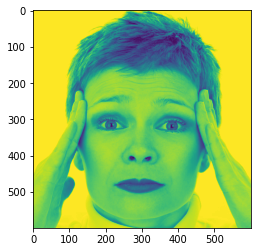

In [4]:
img=cv2.imread('/content/drive/MyDrive/Data_Set/Dataset/Train/Closed/real_00002.jpg',0)
print(type(img))
plt.imshow(img)
plt.show()

Display the color image

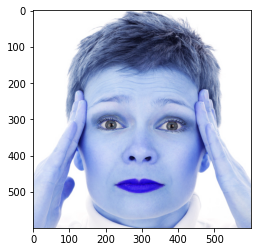

In [8]:
im2=cv2.imread("/content/drive/MyDrive/Data_Set/Dataset/Train/Closed/real_00002.jpg")
plt.imshow(im2)
plt.show()

In [9]:
#Height and width of the image
height, width=img.shape[0:2]
print(height)
print(width)
print(img.shape[0:2])

600
600
(600, 600)


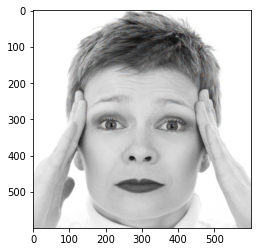

In [19]:
#color change
img_rgb=cv2.cvtColor(img, cv2.COLOR_BAYER_BG2BGRA)
plt.imshow(img_rgb)
plt.show()
#ALTERNATIVELY
#imgrgb = img[:,::-1]
#plt.imshow(imgrgb)
#plt.show()'''



Original image


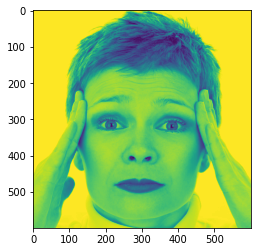


Cropped image


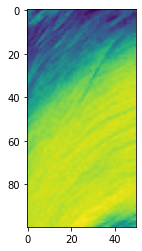

In [21]:
#iMAGE CROPPING
crop_img=img[150:250,150:200]#Cropping positions:xstart:xend, ystart:yend
print("\nOriginal image")
plt.imshow(img)
plt.show()
print("\nCropped image")
plt.imshow(crop_img)

In [23]:
import glob
import os
for file in glob.glob(r'/content/drive/MyDrive/Data_Set/Dataset/Train/Closed'+"**/*.jpg", recursive=True):
  print(os.path.join(r'/content/sample_data/ks',file))

/content/drive/MyDrive/Data_Set/Dataset/Train/Closed/real_00002.jpg
/content/drive/MyDrive/Data_Set/Dataset/Train/Closed/real_00051.jpg
/content/drive/MyDrive/Data_Set/Dataset/Train/Closed/real_00005.jpg
/content/drive/MyDrive/Data_Set/Dataset/Train/Closed/real_00015.jpg
/content/drive/MyDrive/Data_Set/Dataset/Train/Closed/real_00006.jpg
/content/drive/MyDrive/Data_Set/Dataset/Train/Closed/real_00010.jpg
/content/drive/MyDrive/Data_Set/Dataset/Train/Closed/real_00050.jpg
/content/drive/MyDrive/Data_Set/Dataset/Train/Closed/real_00008.jpg
/content/drive/MyDrive/Data_Set/Dataset/Train/Closed/real_00019.jpg
/content/drive/MyDrive/Data_Set/Dataset/Train/Closed/real_00032.jpg
/content/drive/MyDrive/Data_Set/Dataset/Train/Closed/real_00014.jpg
/content/drive/MyDrive/Data_Set/Dataset/Train/Closed/real_00035.jpg
/content/drive/MyDrive/Data_Set/Dataset/Train/Closed/real_00041.jpg
/content/drive/MyDrive/Data_Set/Dataset/Train/Closed/real_00009.jpg
/content/drive/MyDrive/Data_Set/Dataset/Train/Cl

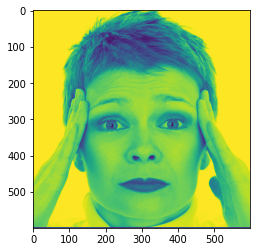

In [37]:
#Image rotation
import numpy as np

#@title Transformation Parameters { run: "auto" }

theta_degrees = 0 #@param {type:"slider", min:0, max:360, step:10}
shift_x = 0 #@param {type:"slider", min:-100, max:100, step:2}
shift_y = -2 #@param {type:"slider", min:-100, max:100, step:2}

# We can also play around with rotations by defining our M matrix, 
# which has the form:
"""
| cos(theta) -sin(theta) tx | 
| sin(theta)  cos(theta) ty |
"""

rows, cols = img.shape

radians = theta_degrees * np.pi / 180
M = [
        [np.cos(radians), -np.sin(radians), shift_x], 
        [np.sin(radians),  np.cos(radians), shift_y]
    ]

M = np.array(M)
rows += int(shift_x)
cols += int(shift_y)

res = cv2.warpAffine(imgrgb, M, (cols,rows))

plt.imshow(res)
plt.show()


# ** Advanced Image Manipulation Techniques**

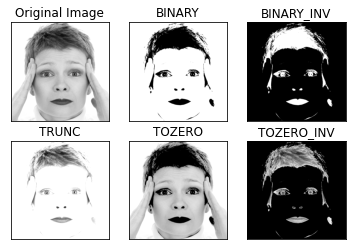

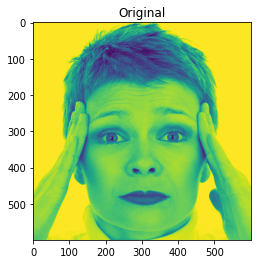

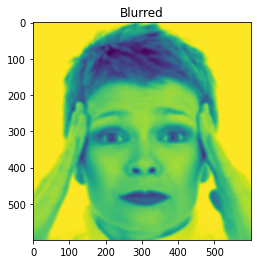

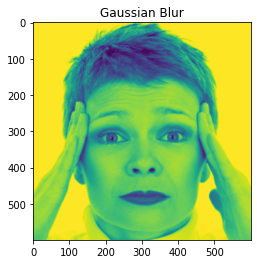

In [42]:
# make things easier!
img = imgrgb

# Thresholding is cool
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),#Add a subplot to the current figure.
    plt.imshow(images[i],'gray')#disply the image
    plt.title(titles[i])#Set a title for the axes.
    plt.xticks([]),#Get or set the current tick locations and labels of the x-axis.
    plt.yticks([])#Get or set the current tick locations and labels of the y-axis.

plt.show()

# Blurring - smoothes the image out
blur = cv2.blur(img,(10, 10))
gblur = cv2.GaussianBlur(imgrgb,(5,5),0)

plt.imshow(img), 
plt.title('Original')
plt.show()
plt.imshow(blur), 
plt.title('Blurred')
plt.show()
plt.imshow(gblur),
plt.title('Gaussian Blur')
plt.show()
